# Machine Learning with Tree-Based Models in Python

Course by [DataCamp](https://learn.datacamp.com/courses/machine-learning-with-tree-based-models-in-python)
Part of [Data Scientist with Python Track](https://learn.datacamp.com/career-tracks/data-scientist-with-python?version=4)

Introduction

Classification and regression problems can be solved with decision trees.

The flexibility of tree models comes at a price: on the one hand, they capture complex nonlinear relationships; on the other hand, they can memorize the noise present
in a dataset. Ensemble methods take advantage of trees' flexibility while reducing their tendency to memorize noise by aggregating predictions from different trees.
Many machine learning competitions have been won by ensemble methods across a variety of fields.

Course Takeaways:

- With the user-friendly scikit-learn machine learning library, train decision trees and tree-based models in Python.

- As we practice on real-world datasets, we'll learn how ensembling alleviates the shortcomings of trees.

- We will also learn how to tune the most influential hyperparameters.

## Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. Here we will get introduction about CART algorithm.

### Decision tree for classification

#### Classification-tree

- Sequence of if-else questions about individual features.
- Objective: infer class labels.
- Able to capture non-linear relationships between features and labels.
- Don't require feature scaling (ex: Standardization, ..)

Example

- Dataset: Wisconsin Breast Cancer Dataset from the UCI machine learning repository with 80% train and 20% test.
- Predict (diagnosis) whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).
  - The feature matrices are assigned to X_train and X_test,
  - The arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor.
  - To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wbc=pd.read_csv('wbc.csv')
print(wbc.head())
X=wbc[['radius_mean', 'concave points_mean']]
y=wbc['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,stratify=y,random_state=1)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test,y_pred)

0.9035087719298246

**Train & Evaluate our first classification tree**

In [4]:
SEED=1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6,random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
print('The first five predictions made by the fitted tree on the test set in the console')

# Import accuracy_score
#from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("\nTest set accuracy: {:.2f}".format(acc))
print('Using only two features, the tree was able to achieve an accuracy of 89%!')

[0 0 0 1 0]
The first five predictions made by the fitted tree on the test set in the console

Test set accuracy: 0.89
Using only two features, the tree was able to achieve an accuracy of 89%!


**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [5]:
import mlxtend.plotting
def plot_labeled_decision_regions(X_test, y_test, clfs):

    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)

        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


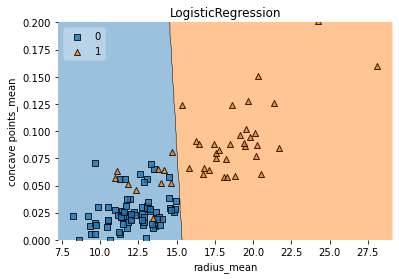

C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


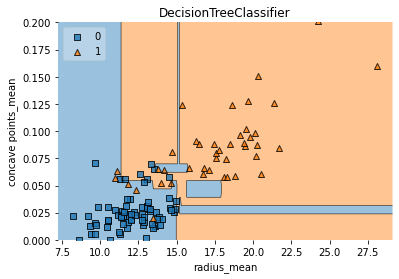

the decision boundary produced by logistic regression is linear
while the boundaries produced by the classification tree divide the feature space into rectangular regions


In [6]:
# Instatiate logreg
logreg = LogisticRegression(solver = 'liblinear', random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

print('the decision boundary produced by logistic regression is linear\
\nwhile the boundaries produced by the classification tree divide the feature space into rectangular regions')

### Classification-Tree Learning
- Nodes are grown recursively.
- At each node, split the data based on:
    - feature f and split-point sp to maximize IG(node).
- If IG(node)= 0, declare the node a leaf.

Example

In [7]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.9210526315789473

### Classification tree Learning

**Using entropy as a criterion**

We will train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. We will do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [8]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [9]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [10]:
# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
print('gini is default to use when criterion not mentioned')

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.9210526315789473
gini is default to use when criterion not mentioned


### Regression Tree
**Train & Evaluate our first regression tree**

- Predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.
- The dataset is split to 80% train and 20% test.

In [11]:
auto= pd.read_csv("auto.csv")
auto_origion=pd.get_dummies(auto.origin)
auto=pd.concat([auto,auto_origion],axis=1).drop('origin',axis=1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']

print(auto.head())

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  


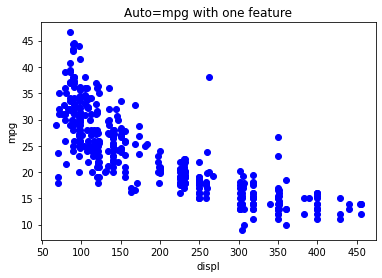

In [12]:
x_disp=auto['displ'].values
y_mpg=auto['mpg'].values
plt.scatter(x_disp,y_mpg,color='blue')
plt.title('Auto=mpg with one feature')
plt.xlabel('displ')
plt.ylabel('mpg')


plt.show()

In [13]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [14]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [15]:
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print('\nThe smaller the means squared error, the closer are to finding the line of best fit.\
Depending on data, it may be impossible to get a very small value for the mean squared error.\
 => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.')

Test set RMSE of dt: 4.27

The smaller the means squared error, the closer are to finding the line of best fit.Depending on data, it may be impossible to get a very small value for the mean squared error. => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.


**Linear regression vs regression tree**

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27


ValueError: x and y must be the same size

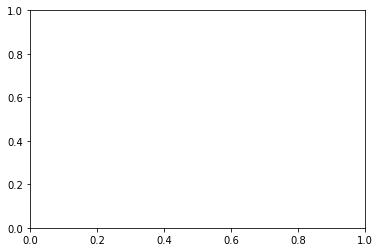

In [18]:
x_disp=auto['displ'].values.reshape(-1,1)
y_mpg=auto['mpg'].values.reshape(-1,1)
#plt.scatter(x_disp,y_mpg,color='blue')
plt.scatter(X_train,y_train,color='blue')
plt.title('Auto=mpg with one feature')
plt.xlabel('displ')
plt.ylabel('mpg')

#linear_predict_space=np.linspace(min(x_disp),max(x_disp)).reshape(-1,1)
#plt.plot(linear_predict_space,y_pred_lr,color='black',linewidth=3)
plt.plot(X_test,y_pred_lr,color='black',linewidth=3)

plt.show()

## The Bias-Variance Tradeoff

In supervised machine learning, the bias-variance tradeoff is a fundamental concept. In this article, we will explore how to diagnose the problems of overfitting and underfitting. Furthermore, we'll learn about the concept of ensembling, in which several models' predictions are aggregated to produce a more reliable prediction.

![](GeneralizationError_Overfitting_Underfitting.png)

![](Bias-VarianceTradeoff.png)

## Generalization Error

### Diagnosing Bias and Variance Problems

    Diagnose the bias and variance problems of a regression tree to predict the mpg
     consumption of cars from the auto dataset using all available features.



In [20]:
auto= pd.read_csv('auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']

X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Estimating the Generalization Error

In [21]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### Evaluate the 10-fold Cross Validation error

In [22]:
# valuate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV_scores = - cross_val_score(dt, X_train, y_train,
                           cv= 10,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [24]:
# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict the labels of the training set
y_pred_train=dt.predict(X_train)
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train,y_pred_train))**(1/2)
# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))
print('dt is indeed underfitting the training set as the model\
\n is too constrained to capture the nonlinear dependencies between features and labels.')

Train RMSE: 5.15
dt is indeed underfitting the training set as the model
 is too constrained to capture the nonlinear dependencies between features and labels.


above the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

## Ensemble Learning
Limitations of CARTs

    Classication: can only produce orthogonal decision boundaries.
    Sensitive to small variations in the training set.
    High variance: unconstrained CARTs may overt the training set.
    => Solution: ensemble learning.

Ensemble Learning

    Train different models on the same dataset.
    Let each model make its predictions.
    Meta-model: aggregates predictions ofindividual models.
    Final prediction: more robust and less prone to errors.
    Best results: models are skillful in different ways.

In [25]:
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [27]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [29]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:

    # Fit clf to the training set
    clf.fit(X_train,y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    print('\nLogistic Regression has the highest accuracy')

Logistic Regression : 0.759

Logistic Regression has the highest accuracy
K Nearest Neighbours : 0.701

Logistic Regression has the highest accuracy
Classification Tree : 0.730

Logistic Regression has the highest accuracy


### Better performance with a Voting Classifier

In [31]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)

# Fit vc to the training set
vc.fit(X_train,y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test,y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))
print('\nThe voting classifier achieves a test set accuracy of 75.3%.\
\nThis value is greater than that achieved by LogisticRegression')

Voting Classifier: 0.770

The voting classifier achieves a test set accuracy of 75.3%.
This value is greater than that achieved by LogisticRegression


## Bagging and Random Forests
The bagging method involves training the same algorithm multiple times based on different subsets of the training data. Here, we will examine how bagging can be used to create an ensemble of trees. Through randomization at the level of each split in the trees forming the ensemble, the random forests algorithm will also enhance ensemble diversity.

In [33]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

print('\nA single tree dt would have achieved an accuracy of 69% which is 4% lower than Classification Tree\'s accuracy!')

Test set accuracy of bc: 0.70

A single tree dt would have achieved an accuracy of 69% which is 4% lower than Classification Tree's accuracy!


### OOB Score vs Test Set Score

In [34]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt,
            n_estimators=50,
            oob_score=True,
            random_state=1)
# Fit bc to the training set
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test,y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.707, OOB accuracy: 0.677



### Random Forest

Random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.
Bagging

    Base estimator: Decision Tree, Logistic Regression, Neural Net, . . .
    Each estimator is trained on a distinct bootstrap sample of the training set
    Estimators use all features for training and prediction

Random Forests

    Base estimator: Decision Tree
    Each estimator is trained on a different bootstrap sample having the same size as the training set
    RF introduces further randomization in the training of individual trees
    d features are sampled at each node without replacement ( d < total number  of featur es )

Random Forests: Classification & Regression

    Classification:
        Aggregates predictions by majority voting
        RandomForestClassifier in sklearn.ensemble
    Regression:
        Aggregates predictions through averaging
        RandomForestRegressor in sklearn.ensemble


In [35]:
bike = pd.read_csv('bikes.csv')
X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [40]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

In [41]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


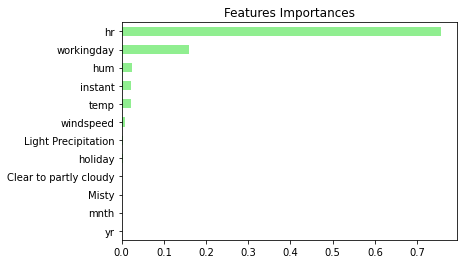

Apparently, hr and workingday are the most important features according to rf.
The importances of these two features add up to more than 90%!


In [42]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightgreen', kind='barh')
plt.title('Features Importances')
plt.show()

print('Apparently, hr and workingday are the most important features according to rf.\
\nThe importances of these two features add up to more than 90%!')

## Boosting
Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. Here we will be introduced to the two boosting methods of AdaBoost and Gradient BoostingBoosting

    Boosting: Ensemble method combining several weak learners to form a strong learner .
    Weak learner: Model doing slightly better than random guessing.
    Example of weak learner: Decision stump (CART whose maximum depth is 1).
    Train an ensemble of predictors sequentially .
    Each predictor tries to correct its predecessor .
    Most popular boosting methods:
        AdaBoost,
        Gradient Boosting.

AdaBoost

    Stands for Adaptive Boosting.
    Each predictor pays more attention to the instances wrongly predicted by its predecessor .
    Achieved by changing the weights of training instances.
    Each predictor is assigned a coeficient α.
    α depends on the predictor's training error .

-AdaBoost: Prediction - Classification: - Weighted majority voting. - In sklearn: AdaBoostClassifier . - Regression: - Weighted average. - In sklearn: AdaBoostRegressor.

    Define the AdaBoost classifier
        Dataset: the Indian Liver Patient dataset
        Task:
            Predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender.
            with AdaBoost ensemble to perform the classification task.
            using the ROC AUC score as a metric instead of accuracy.
        Doing:
            Dataset
            Instantiate dt,ada
            Predict the probabilities of obtaining the positive class in the test set.
            Extract these probabilities by slicing all the values in the second column
            Evaluate ada's ROC AUC score, a binary classifier can be determined using the roc_auc_score()


In [44]:
# Dataset
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
stratify=y,
random_state=SEED)

liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [47]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.69


### Gradient Boosting
Gradient Boosted Trees

    Sequential correction of predecessor's errors.
    Does not tweak the weights of training instances.
    Fit each predictor is trained using its predecessor's residual errors as labels.
    Gradient Boosted T rees: a CART is used as a base learner

Gradient Boosted T rees: Prediction

    Regression:

        In sklearn: GradientBoostingRegressor .
    Classi×cation:
        In sklearn: GradientBoostingClassifier .

Example

    Dataset: Bike Sharing Demand
    Tasks:
        to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C..
        using a gradient boosting regressor.
    Doing:
        Dataset
        Instantiate a gradient boosting regressor
        Train the dataset
        Evaluate the GB regressor

In [48]:
#Dataset
bike = pd.read_csv('bikes.csv')

X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test_gb = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test_gb))

Test set RMSE of gb: 48.279


### Stochastic Gradient Boosting (SGB)
Gradient Boosting

    GB involves an exhaustive search procedure.
    Each CART is trained to find the best split points and features.
    May lead to CARTs using the same split points and maybe the same features.

Stochastic Gradient Boosting

    Each tree is trained on a random subset of rows of the training data.
    The sampled instances (40%-80% of the training set) are sampled without replacement.
    Features are sampled (without replacement) when choosing split points.
    Result: further ensemble diversity .
    Effect: adding further variance to the ensemble of trees.

Example: Regression with SGB

    Dataset Bike Sharing Demand.
    Task: solve this bike count regression problem using stochastic gradient boosting.
    Doing
        Dataset
        Train the SGB regressor
        Predict the test set labels.
        Evaluate test set.


In [52]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4,
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Import mean_squared_error as MSE
#from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test_sgb = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test_sgb))
print('Test set RMSE of gb: {:.3f}'.format(rmse_test_gb))

print('\nThe stochastic gradient boosting regressor achieves a lower test set RMSE\
\nthan the gradient boosting regressor, which was {:.3f}'.format(rmse_test_gb) )

Test set RMSE of sgbr: 52.629
Test set RMSE of gb: 48.279

The stochastic gradient boosting regressor achieves a lower test set RMSE
than the gradient boosting regressor, which was 48.279


## Model Tuning

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. Here we'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.

Tuning a CART's hyperparameters
Hyperparameters

Machine learning model:

    parameters: learned from data
        CART example: split-point of a node, split- feature of a node, ...
    hyperparameters: not learned from data, set prior to training
        CART example: max_depth, min_samples_leaf, splitting criterion...

What is hyperparameter tuning?

    Problem: search for a set of optimal hyperparameters for a learning algorithm.
    Solution: find a set of optimal hyperparameters that results in an optimal model.
    Optimal model: yields an optimal score.
    Score: in sklearn defaults to accuracy (classification) and R (regression).
    Cross validation is used to estimate the generalization performance.

Why tune hyperparameters?

    In sklearn, a model's default hyperparameters are not optimal for all problems.
    Hyperparameters should be tuned to obtain the best model performance.

Grid search cross validation

    Manually set a grid of discrete hyperparameter values.

Set a metric for scoring model performance.

    hyperparameter space =

Search exhaustively through the grid.
For each set of hyperparameters, evaluate each model's CV score.

    CV scores = {

        , . . . }
    The optimal hyperparameters are those of the model achieving the best CV score.
        optimal hyperparameters = set of hyperparameters corresponding to the best CV score

Example:

Hyperparameter of DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
          ```
=> `mean_features` not a Hyperparameter of `DecisionTreeClassifier`
#### Doing
- Inspecting the hyperparameters of a CART in `sklearn`
- Extracting the best hyperparameters
    - Set the tree's hyperparameter grid
    - Define params_dt
    - Evaluate the optimal tree
    - Compute the test set ROC AUC score.
- Extracting the best estimator


In [57]:
SEED=1
#Dataset
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']

dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=1,
            splitter='best')


#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [58]:
params_dt = {
'max_depth': [2,3, 4],
'min_samples_leaf': [0.12, 0.14, 0.16, 0.18] }

# performing the grid search.
## Import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [59]:
# Extract the best estimator
best_model = grid_dt.best_estimator_
print('Best estimator:\n', best_model)

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Best estimator:
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.14, random_state=1)
Test set ROC AUC score: 0.731


### Tuning an RF's Hyperparameters
Random Forests Hyperparameters

    CART hyperparameters
    number of estimators
    bootstrap

Tuning is expensive

    Hyperparameter tuning:
        computationally expensive,
        sometimes leads to very slight improvement,
    Weight the impact of tuning on the whole project

Doing:

    Instantiate RF
    Instantiate GridsearchCV
    Evaluating the test set RMSE of the best model

In [60]:
rf = RandomForestRegressor()

# Define the dictionary 'params_rf'
params_rf = {
   'max_features': ['log2', 'auto', 'sqrt'],
 'min_samples_leaf': [2, 10, 30],
 'n_estimators': [100, 350, 500],
 }

# Import GridSearchCV
#from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

bike = pd.read_csv('bikes.csv')
X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
grid_rf.fit(X_train, y_train)

# Fit with train set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 51.384
